## Otimização de portfólio de investimentos com algoritmo genético

### 1. Importação das bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import yfinance as yf
import random

from deap import algorithms, base, creator, tools

In [2]:
#stocks = ['ITUB4.SA', 'RENT3.SA', 'PETR4.SA', 'WEGE3.SA', 'RADL3.SA', 'MGLU3.SA', 'ELET6.SA']
stocks = ['WEGE3.SA', 'VIVT3.SA', 'RENT3.SA', 'ABEV3.SA', 'ITUB4.SA', 'VALE3.SA', 'ATOM3.SA', 'PETR4.SA', 'RDOR3.SA', 'TOTS3.SA', 'ELET6.SA']
data = yf.download(stocks, start='2021-01-01', end='2022-12-31')['Adj Close']

data

[*********************100%***********************]  11 of 11 completed


,ABEV3.SA,ATOM3.SA,ELET6.SA,ITUB4.SA,PETR4.SA,RDOR3.SA,RENT3.SA,TOTS3.SA,VALE3.SA,VIVT3.SA,WEGE3.SA
Date,,,,,,,,,,,
2021-01-04,14.085718,2.405986,30.883390,27.947104,11.470779,63.675343,64.907990,27.178005,69.413040,38.887127,35.927429
2021-01-05,14.385996,2.472819,29.996130,27.766212,11.919135,62.931980,64.524956,27.050726,70.581818,38.556999,38.132572
2021-01-06,14.677172,2.502522,29.825502,28.580210,11.942942,60.321903,60.809345,25.768192,72.896599,38.125301,39.143665
2021-01-07,14.604378,2.443115,29.262436,29.692669,12.300040,58.920185,63.691807,25.699661,77.655174,37.160320,40.761410
2021-01-08,15.041146,2.517374,30.115568,29.683622,12.347654,60.157566,67.991570,27.412971,77.412315,38.133770,43.226540
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,14.620000,2.189443,42.900005,24.558758,20.983215,29.200001,55.279930,28.134451,84.465065,36.565910,38.168091
2022-12-26,14.520000,2.180470,42.582867,24.071287,20.832857,29.840000,53.768250,26.844334,85.238083,35.710239,37.860764
2022-12-27,14.520000,2.126631,41.621845,23.934797,20.974861,30.059999,51.762566,26.556540,87.273392,35.567627,37.682316


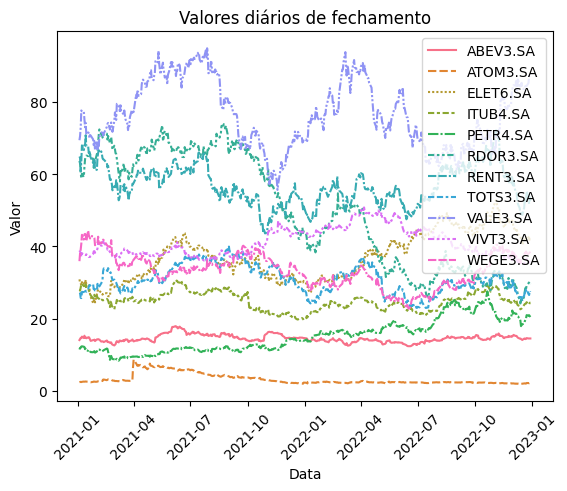

In [3]:
# Simples visualização das séries
sns.lineplot(data = data)
plt.xticks(rotation = 45)
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Valores diários de fechamento')
plt.show()

In [4]:
returns = data.pct_change().dropna()
returns

,ABEV3.SA,ATOM3.SA,ELET6.SA,ITUB4.SA,PETR4.SA,RDOR3.SA,RENT3.SA,TOTS3.SA,VALE3.SA,VIVT3.SA,WEGE3.SA
Date,,,,,,,,,,,
2021-01-05,0.021318,0.027778,-0.028729,-0.006473,0.039087,-0.011674,-0.005901,-0.004683,0.016838,-0.008489,0.061378
2021-01-06,0.020240,0.012012,-0.005688,0.029316,0.001997,-0.041475,-0.057584,-0.047412,0.032796,-0.011196,0.026515
2021-01-07,-0.004960,-0.023739,-0.018879,0.038924,0.029900,-0.023237,0.047402,-0.002660,0.065278,-0.025311,0.041328
2021-01-08,0.029907,0.030395,0.029155,-0.000305,0.003871,0.021001,0.067509,0.066667,-0.003127,0.026196,0.060477
2021-01-11,-0.026013,0.026549,-0.021813,-0.022547,-0.008355,-0.015909,-0.019437,-0.001786,-0.000196,-0.011321,-0.030630
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.013870,0.074890,0.015931,0.015726,0.047103,0.035094,0.054665,0.014674,0.006647,0.012105,-0.011299
2022-12-26,-0.006840,-0.004098,-0.007393,-0.019849,-0.007166,0.021918,-0.027346,-0.045855,0.009152,-0.023401,-0.008052
2022-12-27,0.000000,-0.024691,-0.022568,-0.005670,0.006816,0.007373,-0.037302,-0.010721,0.023878,-0.003994,-0.004713


### 2. Criação de um portfólio de risco mínimo

Quando estamos trabalhando com Algoritmos Genéticos, geralmente temos dois objetivos a alcançar: minimizar o risco ou maximizar o retorno

In [5]:
n_stocks = len(returns.columns)

In [ ]:
creator.create('FitnessMin', base.Fitness, weights=(-1.0,))  # O objetivo é minimizar a solução
creator.create("Individual", list, fitness=creator.FitnessMin)  # Lista com os primeiros indivíduos 

In [49]:
def generateES(icls, size, imin, imax):
    ind = icls(random.uniform(imin, imax) for _ in range(size))
    return ind

def calculate_returns(individual, dataset=returns):
    x = dataset.mul(individual).sum(axis=1)  # Soma dos retornos da carteira dia a dia
    x = x + 1
    x = x.cumprod() - 1
    return x

def calculate_risk(individual):
    """
    Calcula o risco da carteira baseado no desvio padrão.
    Função que será minimizada pelo algoritmo genético.
    """
    cvm = np.std(calculate_returns(individual))
    return cvm

def evaluate_portfolio(individual):
    risk = calculate_risk(individual)

    penalty = abs((np.sum(individual) - 1)**2)  # Penalidade para a soma dos pesos ser 1
    alocation_penalty = 0
    if max(individual) > 0.33:
        alocation_penalty = 100
    return (float(risk + 100*penalty + alocation_penalty),)

In [50]:
lower_bound = 0
upper_bound = 1

In [64]:
toolbox = base.Toolbox()
toolbox.register('attr_bool', random.randint, 0, 1)
toolbox.register("individual", generateES, creator.Individual, n_stocks, 0, 1) # Cria os indivíduos iniciais com n_stocks cromossomos
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Coleção dos indívduos iniciais - serão armazenados em uma lista
toolbox.register("evaluate", evaluate_portfolio)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutPolynomialBounded, eta=0.5, low=lower_bound, up=upper_bound, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=5)

In [65]:
population_size = 100
num_generations = 50
cx_prob = 0.5
mut_prob = 0.2

In [66]:
population = toolbox.population(n=population_size)
algorithms.eaSimple(population, toolbox, cx_prob, mut_prob, num_generations)

gen	nevals
0  	100   
1  	63    
2  	49    
3  	53    
4  	54    
5  	63    
6  	64    
7  	38    
8  	65    
9  	64    
10 	51    
11 	57    
12 	65    
13 	72    
14 	60    
15 	68    
16 	55    
17 	69    
18 	62    
19 	58    
20 	66    
21 	59    
22 	72    
23 	57    
24 	61    
25 	57    
26 	46    
27 	63    
28 	51    
29 	69    
30 	46    
31 	61    
32 	62    
33 	48    
34 	59    
35 	63    
36 	57    
37 	53    
38 	65    
39 	60    
40 	55    
41 	60    
42 	72    
43 	61    
44 	57    
45 	62    
46 	66    
47 	59    
48 	62    
49 	55    
50 	73    


([[0.04619161964162599,
   0.09771502662010467,
   0.009509254012912138,
   0.006846492077992594,
   0.06601841600986735,
   0.07137776368274784,
   0.07500309420158868,
   0.0987897956630821,
   0.1418235495035075,
   0.1022466457863439,
   0.21530364136106905],
  [0.04619161964162599,
   0.09771502662010467,
   0.02455250462529268,
   0.006846492077992594,
   0.12004246465571122,
   0.07137776368274784,
   0.07500309420158868,
   0.0987897956630821,
   0.1418235495035075,
   0.1022466457863439,
   0.21530364136106905],
  [0.04619161964162599,
   0.09771502662010467,
   0.02455250462529268,
   0.6276132821171477,
   0.12004246465571122,
   0.07137776368274784,
   0.059738468855721205,
   0.0987897956630821,
   0.1418235495035075,
   0.37459101758338076,
   0.21530364136106905],
  [0.04619161964162599,
   0.09771502662010467,
   0.02455250462529268,
   0.006846492077992594,
   0.12004246465571122,
   0.029791602465767064,
   0.07500309420158868,
   0.19594444104663644,
   0.60834148080

In [67]:
best_individual = tools.selBest(population, k=1)[0]
best_individual

[0.04619161964162599,
 0.09771502662010467,
 0.02455250462529268,
 0.006846492077992594,
 0.12004246465571122,
 0.07137776368274784,
 0.07500309420158868,
 0.0987897956630821,
 0.1418235495035075,
 0.1022466457863439,
 0.21530364136106905]

In [68]:
np.sum(best_individual)

0.9998925978190663

In [69]:
data.head(1)

,ABEV3.SA,ATOM3.SA,ELET6.SA,ITUB4.SA,PETR4.SA,RDOR3.SA,RENT3.SA,TOTS3.SA,VALE3.SA,VIVT3.SA,WEGE3.SA
Date,,,,,,,,,,,
2021-01-04,14.085718,2.405986,30.88339,27.947104,11.470779,63.675343,64.90799,27.178005,69.41304,38.887127,35.927429


In [70]:
def port_return(weights, dataset=returns):
    x = dataset.mul(weights).sum(axis=1)  # Soma dos retornos da carteira dia a dia
    x = x + 1
    x = x.cumprod() - 1
    return x.tail(1)

In [71]:
weights_vanilla = np.full(n_stocks, 1/n_stocks)
print('Retorno otimizado:', port_return(best_individual))
print('-'*20)
print('Retorno normal:', port_return(weights_vanilla))

Retorno otimizado: Date
2022-12-29    0.200388
dtype: float64
--------------------
Retorno normal: Date
2022-12-29    0.141775
dtype: float64


In [72]:
print('Retorno médio otimizado:', calculate_returns(best_individual).mean())
print('-'*20)
print('Retorno médio normal:', calculate_returns(weights_vanilla).mean())

Retorno médio otimizado: 0.13291620184908676
--------------------
Retorno médio normal: 0.1187214624332663


In [73]:
print('Desvio padrão carteira otimizada:', calculate_returns(best_individual).std())
print('-'*20)
print('Desvio padrão carteira normal:', calculate_returns(weights_vanilla).std())

Desvio padrão carteira otimizada: 0.07513441252964413
--------------------
Desvio padrão carteira normal: 0.07978805115835383


In [79]:
optimized_portfolio = (returns*best_individual).sum(axis=1)  # Soma dos retornos da carteira dia a dia
optimized_portfolio = optimized_portfolio + 1
optimized_portfolio = optimized_portfolio.cumprod() - 1
px.line(optimized_portfolio, title='Estratégia otimizada', x=optimized_portfolio.index, y=optimized_portfolio.values)

In [75]:
vanilla_portfolio = (returns*weights_vanilla).sum(axis=1)
vanilla_portfolio = vanilla_portfolio + 1
vanilla_portfolio = vanilla_portfolio.cumprod() - 1
px.line(vanilla_portfolio, title='Estratégia sem otimização', x=vanilla_portfolio.index, y=vanilla_portfolio.values)

In [20]:
data_test = yf.download(stocks, start='2023-01-01', end='2023-05-01')['Adj Close']
data_test = data_test.pct_change().dropna()

[*********************100%***********************]  11 of 11 completed


In [76]:
print('Retorno otimizado teste:', port_return(best_individual, dataset=data_test))
print('-'*20)
print('Retorno normal teste:', port_return(weights_vanilla, dataset=data_test))

Retorno otimizado teste: Date
2023-04-28    0.058099
dtype: float64
--------------------
Retorno normal teste: Date
2023-04-28    0.047323
dtype: float64


In [77]:
print('Retorno médio otimizado:', calculate_returns(best_individual, dataset=data_test).mean())
print('-'*20)
print('Retorno médio normal:', calculate_returns(weights_vanilla, dataset=data_test).mean())

Retorno médio otimizado: 0.03779467776739413
--------------------
Retorno médio normal: 0.02654261259134097


In [78]:
print('Desvio padrão carteira otimizada:', calculate_returns(best_individual, dataset=data_test).std())
print('-'*20)
print('Desvio padrão carteira normal:', calculate_returns(weights_vanilla, dataset=data_test).std())

Desvio padrão carteira otimizada: 0.018118067810919705
--------------------
Desvio padrão carteira normal: 0.023603736786014205


In [80]:
opt_teste = data_test.mul(best_individual).sum(axis=1)  # Soma dos retornos da carteira dia a dia
opt_teste = opt_teste + 1
opt_teste = opt_teste.cumprod() - 1
px.line(opt_teste, title='Estratégia otimizada', x=opt_teste.index, y=opt_teste.values)

In [81]:
vanilla = data_test.mul(weights_vanilla).sum(axis=1)
vanilla = vanilla + 1
vanilla = vanilla.cumprod() - 1
px.line(vanilla, title='Estratégia sem otimização', x=vanilla.index, y=vanilla.values)

### Max return

In [24]:
creator.create('FitnessMax', base.Fitness, weights=(1.0,))  # O objetivo é minimizar a solução
creator.create("Individual", list, fitness=creator.FitnessMax)

c:\Users\Yamac\AppData\Local\Programs\Python\Python310\lib\site-packages\deap\creator.py:138: RuntimeWarning:

A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.



In [25]:
def calculate_returns_cum(individual, dataset=returns):
    x = returns.mul(individual).sum(axis=1)  # Soma dos retornos da carteira dia a dia
    x = x + 1
    x = x.cumprod() - 1
    return x.tail(1)

def evaluate_portfolio(individual):
    # Calculate returns and risk based on individual weights
    returns = calculate_returns_cum(individual)

    penalty = abs((np.sum(individual) - 1)**2)  # Penalidade para a soma dos pesos ser 1
    alocation_penalty = 0
    if max(individual) > 0.33:
        alocation_penalty = 100
    # Return a tuple of the fitness values (returns, -risk as it's a maximization problem)
    #return float(returns - 100*penalty -alocation_penalty), float(risk + 100*penalty + alocation_penalty)
    return (float(returns - 150*penalty - alocation_penalty),)

In [26]:
toolbox = base.Toolbox()
toolbox.register('attr_bool', random.randint, 0, 1)
toolbox.register("individual", generateES, creator.Individual, n_stocks, 0, 1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Coleção dos indívduos iniciais - serão armazenados em uma lista
toolbox.register("evaluate", evaluate_portfolio)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutPolynomialBounded, eta=0.5, low=lower_bound, up=upper_bound, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

In [27]:
population = toolbox.population(n=population_size)
algorithms.eaSimple(population, toolbox, cx_prob, mut_prob, num_generations)

gen	nevals
0  	100   
1  	61    
2  	63    
3  	68    
4  	65    
5  	54    
6  	60    
7  	65    
8  	60    
9  	60    
10 	58    
11 	58    
12 	65    
13 	61    
14 	50    
15 	62    
16 	61    
17 	71    
18 	58    
19 	49    
20 	47    
21 	61    
22 	62    
23 	63    
24 	47    
25 	59    
26 	62    
27 	53    
28 	66    
29 	68    
30 	58    
31 	47    
32 	55    
33 	67    
34 	65    
35 	61    
36 	58    
37 	63    
38 	51    
39 	48    
40 	59    
41 	61    
42 	58    
43 	64    
44 	64    
45 	62    
46 	70    
47 	60    
48 	72    
49 	63    
50 	59    


([[0.03610327283150716,
   0.09610957334680448,
   0.026668454101507977,
   0.018243436734834417,
   0.2421754677832938,
   0.022530581445369235,
   0.015204980171214189,
   0.03160585175676722,
   0.24376490207702528,
   0.2022622091957622,
   0.05852648801809823],
  [0.03610327283150716,
   0.09610957334680448,
   0.026668454101507977,
   0.018243436734834417,
   0.2421754677832938,
   0.022530581445369235,
   0.015204980171214189,
   0.03160585175676722,
   0.24376490207702528,
   0.2022622091957622,
   0.05852648801809823],
  [0.03610327283150716,
   0.09610957334680448,
   0.026668454101507977,
   0.018243436734834417,
   0.2421754677832938,
   0.022530581445369235,
   0.015204980171214189,
   0.03160585175676722,
   0.24376490207702528,
   0.2022622091957622,
   0.05852648801809823],
  [0.03610327283150716,
   0.09610957334680448,
   0.026668454101507977,
   0.018243436734834417,
   0.2421754677832938,
   0.022530581445369235,
   0.015204980171214189,
   0.03160585175676722,
   0

In [28]:
best_individual = tools.selBest(population, k=1)[0]
best_individual

[0.03610327283150716,
 0.09610957334680448,
 0.026668454101507977,
 0.018243436734834417,
 0.2421754677832938,
 0.022530581445369235,
 0.015204980171214189,
 0.03160585175676722,
 0.24376490207702528,
 0.2022622091957622,
 0.05852648801809823]

In [29]:
np.sum(best_individual)

0.9931952174621842

In [30]:
print('Retorno otimizado:', port_return(best_individual))
print('-'*20)
print('Retorno normal:', port_return(weights_vanilla))

Retorno otimizado: Date
2022-12-29    0.355012
dtype: float64
--------------------
Retorno normal: Date
2022-12-29    0.141775
dtype: float64


In [31]:
print('Retorno otimizado teste:', port_return(best_individual, dataset=data_test))
print('-'*20)
print('Retorno normal teste:', port_return(weights_vanilla, dataset=data_test))

Retorno otimizado teste: Date
2023-04-28    0.058171
dtype: float64
--------------------
Retorno normal teste: Date
2023-04-28    0.047323
dtype: float64


### Sharpe Ratio

In [32]:
def sharpe_eval(individual):
    returns = calculate_returns_cum(individual)
    sharpe = returns - 0.05/calculate_returns(individual).std()
    
    penalty = abs((np.sum(individual) - 1)**2)  # Penalidade para a soma dos pesos ser 1
    alocation_penalty = 0
    if max(individual) > 0.33:
        alocation_penalty = 100

    return (float(returns - 100*penalty - alocation_penalty),)

In [33]:
toolbox = base.Toolbox()
toolbox.register('attr_bool', random.randint, 0, 1)
toolbox.register("individual", generateES, creator.Individual, n_stocks, 0, 1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Coleção dos indívduos iniciais - serão armazenados em uma lista
toolbox.register("evaluate", sharpe_eval)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutPolynomialBounded, eta=0.5, low=lower_bound, up=upper_bound, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

In [34]:
population = toolbox.population(n=population_size)
algorithms.eaSimple(population, toolbox, cx_prob, mut_prob, num_generations)

gen	nevals
0  	100   
1  	66    
2  	74    
3  	59    
4  	58    
5  	65    
6  	60    
7  	52    
8  	52    
9  	56    
10 	63    
11 	70    
12 	59    
13 	59    
14 	62    
15 	62    
16 	69    
17 	63    
18 	55    
19 	60    
20 	56    
21 	77    
22 	45    
23 	66    
24 	58    
25 	73    
26 	55    
27 	58    
28 	62    
29 	52    
30 	68    
31 	60    
32 	60    
33 	59    
34 	60    
35 	63    
36 	56    
37 	43    
38 	68    
39 	58    
40 	52    
41 	53    
42 	58    
43 	60    
44 	50    
45 	59    
46 	62    
47 	58    
48 	59    
49 	64    
50 	48    


([[0.005724390389551748,
   0.05851546923936224,
   0.020348223664092835,
   0.17985788264751457,
   0.3051331954118691,
   0.0005933316307529246,
   0.003157405969652749,
   0.15720826935643462,
   0.01813425772021582,
   0.15231668011884136,
   0.09678061753489697],
  [0.005724390389551748,
   0.05851546923936224,
   0.020348223664092835,
   0.17985788264751457,
   0.3051331954118691,
   0.0011122290488130293,
   0.003157405969652749,
   0.15720826935643462,
   0.01813425772021582,
   0.15231668011884136,
   0.09678061753489697],
  [0.005724390389551748,
   0.05851546923936224,
   0.020348223664092835,
   0.17985788264751457,
   0.3051331954118691,
   0.0011122290488130293,
   0.003157405969652749,
   0.15720826935643462,
   0.01813425772021582,
   0.15231668011884136,
   0.09678061753489697],
  [0.005724390389551748,
   0.05851546923936224,
   0.020348223664092835,
   0.17985788264751457,
   0.3051331954118691,
   0.001023480540735866,
   0.003157405969652749,
   0.25336122709691167

In [35]:
best_individual = tools.selBest(population, k=1)[0]
best_individual

[0.005724390389551748,
 0.05851546923936224,
 0.020348223664092835,
 0.17985788264751457,
 0.3051331954118691,
 0.0005933316307529246,
 0.003157405969652749,
 0.15720826935643462,
 0.01813425772021582,
 0.15231668011884136,
 0.09678061753489697]

In [36]:
np.sum(best_individual)

0.997769723683185

In [37]:
print('Retorno otimizado:', port_return(best_individual))
print('-'*20)
print('Retorno normal:', port_return(weights_vanilla))

Retorno otimizado: Date
2022-12-29    0.309667
dtype: float64
--------------------
Retorno normal: Date
2022-12-29    0.141775
dtype: float64


In [38]:
print('Retorno otimizado teste:', port_return(best_individual, dataset=data_test))
print('-'*20)
print('Retorno normal teste:', port_return(weights_vanilla, dataset=data_test))

Retorno otimizado teste: Date
2023-04-28    0.112265
dtype: float64
--------------------
Retorno normal teste: Date
2023-04-28    0.047323
dtype: float64
